In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data = ImageDataGenerator(rescale=1/255)
test_data = ImageDataGenerator(rescale=1/255)

In [3]:
train_path = r"D:\datasets\DL\chest_xray\train"
test_path = r"D:\datasets\DL\chest_xray\test"

In [4]:
train = train_data.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical"
)

Found 5232 images belonging to 2 classes.


In [5]:
classes = [x for x in train.class_indices.keys()]
print("Classes:", classes)

Classes: ['NORMAL', 'PNEUMONIA']


In [6]:
test = test_data.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical"
)

Found 624 images belonging to 2 classes.


In [7]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(classes), activation='softmax')  # Output layer for the number of classes
])

C:\Users\Tanmay LImje\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
report = model.fit(train, epochs=10, validation_data=test)

Epoch 1/10


C:\Users\Tanmay LImje\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.7010 - loss: 0.5771 - val_accuracy: 0.6250 - val_loss: 0.7225
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 65s 751ms/step - accuracy: 0.8082 - loss: 0.4476 - val_accuracy: 0.6763 - val_loss: 0.6276
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 56s 640ms/step - accuracy: 0.8608 - loss: 0.3431 - val_accuracy: 0.8846 - val_loss: 0.3085
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 59s 689ms/step - accuracy: 0.8919 - loss: 0.2636 - val_accuracy: 0.7308 - val_loss: 0.6725
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 57s 672ms/step - accuracy: 0.9275 - loss: 0.1870 - val_accuracy: 0.9006 - val_loss: 0.2783
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 54s 624ms/step - accuracy: 0.9346 - loss: 0.1673 - val_accuracy: 0.8574 - val_loss: 0.3971
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 53s 616ms/step - accuracy: 0.9380 - loss: 0.1604 - val_accuracy: 0.7596 - val_loss: 0.7080
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 54s 628ms/step - accuracy: 0.9490 - loss: 0.1416 - val_accuracy: 0.8718 -

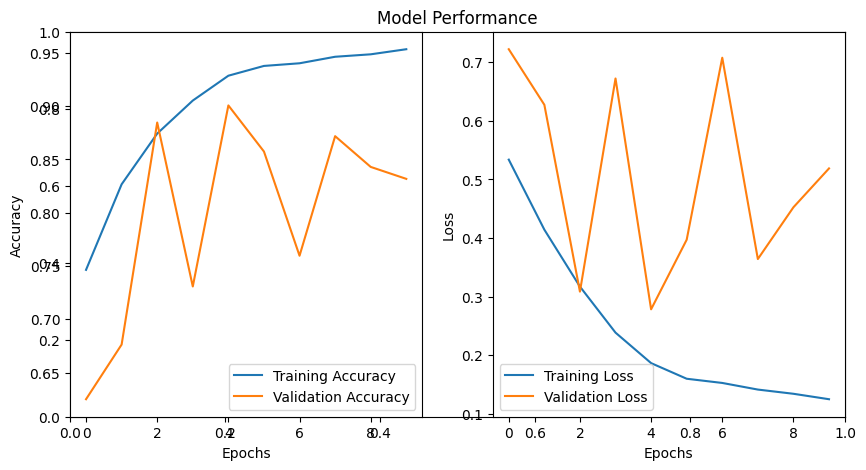

In [11]:
plt.figure(figsize=(10, 5))
plt.title("Model Performance")
plt.subplot(1, 2, 1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(report.history['accuracy'], label='Training Accuracy')
plt.plot(report.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(report.history['loss'], label='Training Loss')
plt.plot(report.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [12]:
def softmax_to_category(x):
    return np.argmax(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


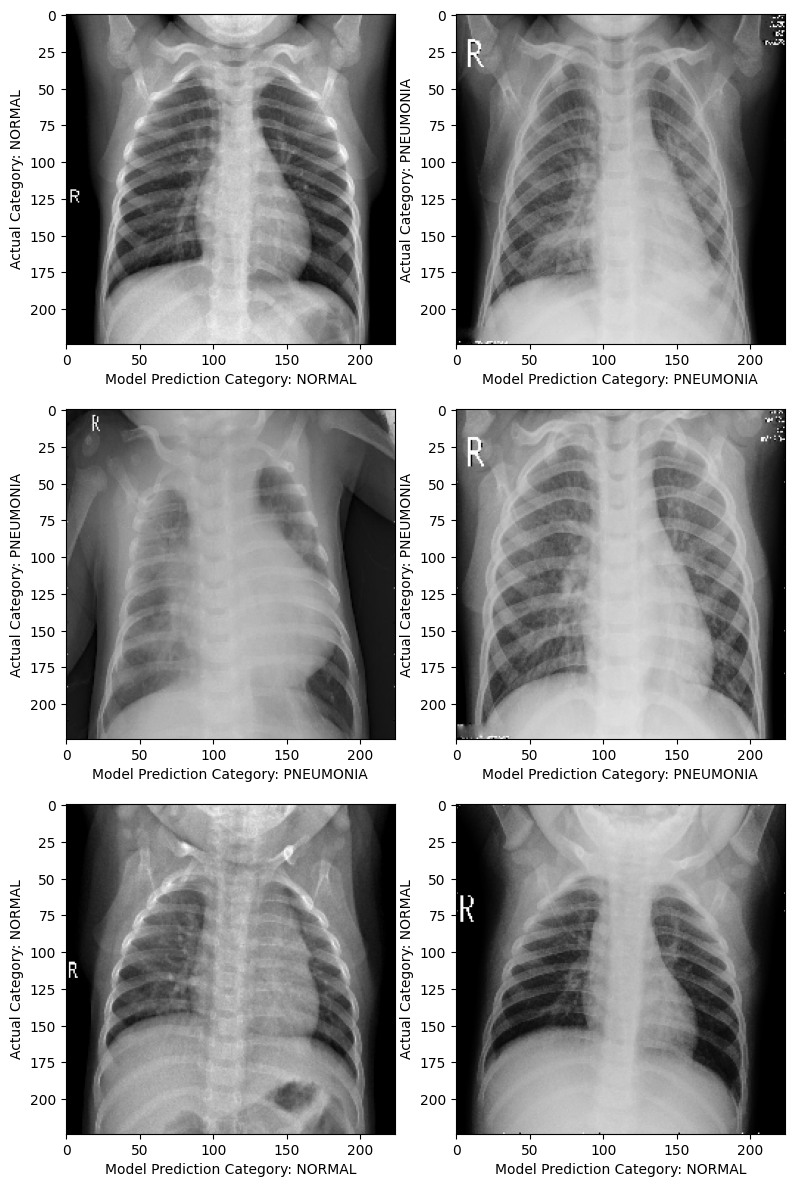

In [13]:
plt.figure(figsize=(8, 12))
for x in range(6, 12):
    plt.subplot(3, 2, x + 1 - 6)
    # Reshape the image to add a batch dimension
    image = test[0][0][x]
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    plt.xlabel(f"Model Prediction Category: {classes[softmax_to_category(model.predict(image))]}")
    plt.ylabel(f"Actual Category: {classes[softmax_to_category(test[0][1][x])]}")
    plt.imshow(test[0][0][x])
plt.tight_layout()
plt.show()